# Data Analysis in Python

In this workshop we will focus on using Python libraries for data wrangling, visualisation, and analysis.

In [2]:
%%HTML
<div style="text-align: center"> 
<iframe width="560" height="315" src="https://youtube.com/embed/HjF98JryayQ" frameborder="0" allowfullscreen></iframe>

</div>

## Importing pandas

Fire up a Jupyter Notebook. In order to read in and then wrangle our data, the first thing we need to do once we've opened a new script in our `data_science` environment is to import the pandas library. We will import it using the conventional alias `pd`. When we need to use a function or method from pandas later, we can do that with `pd.*function/method_name*`. You can read more about the library [here](https://pandas.pydata.org/).

In [1]:
import pandas as pd

We'll start by reading in some data using the pandas function `pd.read_csv`. The data are available via the `http` address below. If you've taken my R course, then you'll recognise this as the same data file that we looked at in the first R workshop on ANOVA. 

24 participants responded to a word that was either common (i.e., high lexical frequency) or rare (i.e., low lexical frequency). This is our independent variable and is coded as `high` vs. `low`. Our dependent variable is reaction time and is coded as `RT`. Subject number is coded as `Subject`. We want to know whether there is a difference between conditions (and if so, where that difference lies). 

We need to visualise the data, generate descriptives, and run the appropriate ANOVA to determine whether our independent variable (Condition) has an influence on our dependent variable (RT).

In [2]:
anova_data = pd.read_csv("https://raw.githubusercontent.com/ajstewartlang/02_intro_to_python_programming/main/data/ANOVA_data1.csv")

We can inspect the first few lines of the dataframe using the `.head()` method.

In [3]:
anova_data.head()

,Subject,Condition,RT
0,1,low,1103
1,2,low,1170
2,3,low,1225
3,4,low,1084
4,5,low,1219


We can use other `pandas` methods such as `.describe()`, `.info()` and `.hist()` to explore our dataframe further.

In [4]:
anova_data.describe()

,Subject,RT
count,24.000000,24.000000
mean,12.500000,1021.416667
std,7.071068,178.388661
min,1.000000,733.000000
25%,6.750000,862.250000
50%,12.500000,1050.000000
75%,18.250000,1178.250000
max,24.000000,1326.000000


In [5]:
anova_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Subject    24 non-null     int64 
 1   Condition  24 non-null     object
 2   RT         24 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 704.0+ bytes


array([[<AxesSubplot:title={'center':'Subject'}>,
        <AxesSubplot:title={'center':'RT'}>]], dtype=object)

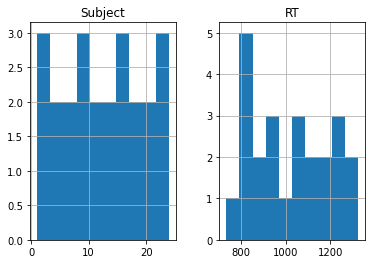

In [6]:
anova_data.hist()

The Subject plot above really isn't very informative, so let's just plot the RT data. So far though, this isn't split by our experimental groups. We'll come to that next.

<AxesSubplot:>

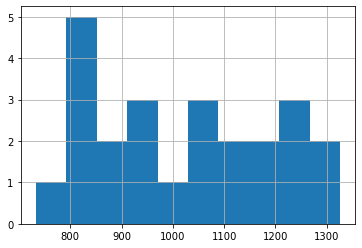

In [11]:
anova_data['RT'].hist()

## Visualising Our Data by Groups

We need to use the `matplotlib` library for the rest of our visualisations. This library contains a huge range of tools for visualising data. You can read more about it [here](https://matplotlib.org/stable/). 

In [13]:
import matplotlib.pyplot as plt

In the code below we used the `plot` function from `pyplot` (which we have imported under the alias `plt`. We build our plot layer by layer (similar to how we do things in `R` with `ggplot2`). There is even a built-in `ggplot` style we can use. We define our plot initially in terms of what's on the x-axis, what's on the y-axis, and then what marker we want to use - which in this case is blue circles (`bo`).

After this, we then add an x-axis label, a y-axis label, and a title. We also set the margins to make the plot like nice.

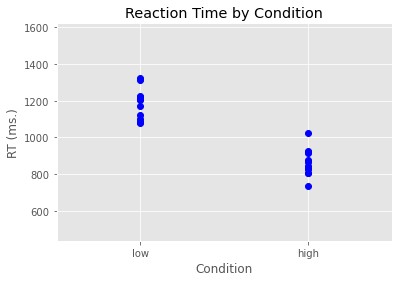

In [37]:
plt.style.use('ggplot')
plt.plot(anova_data['Condition'], anova_data['RT'], 'bo')
plt.xlabel('Condition')
plt.ylabel('RT (ms.)')
plt.title('Reaction Time by Condition')
plt.margins(.5, .5)
plt.show()

Let's now work out some descriptive statistics using `pandas`  functions. We'll use the `groupby` function to group `anova_data` by `Condition`, and we'll map this onto a new variable I'm calling `grouped_data`.

In [32]:
grouped_data = anova_data.groupby(['Condition'])

We can then generate some descriptives about this grouped dataframe. We can use the `count` function to work out how many observations we have for each of our two conditions.

In [26]:
grouped_data.count()

,Subject,RT
Condition,,
high,12,12
low,12,12


If we wanted just to output the count for our `RT` column we could do the following.

In [27]:
grouped_data.count()['RT']

Condition
high    12
low     12
Name: RT, dtype: int64

From the above we can see we have 12 observations in each condition, and our variable RT is type integer. We can use other `pandas` functions such as `mean()` and `std()` in a similar way.

In [28]:
grouped_data.mean()['RT']

Condition
high     864.666667
low     1178.166667
Name: RT, dtype: float64

In [29]:
grouped_data.std()['RT']

Condition
high    74.722923
low     85.708633
Name: RT, dtype: float64

Sometimes it can be useful to think of the `.` notation in Python as meaning 'and then'. We could combine some of the commands above into one using `.` which would allow us to do away with creating the temporary variable `grouped_data`. For example, the following will take our original dataframe, then group it by `Condition`, then generate the means, displaying only the RT `column`.

In [34]:
anova_data.groupby(['Condition']).mean()['RT']

Condition
high     864.666667
low     1178.166667
Name: RT, dtype: float64

We can map our means onto a new variable I'm calling `my_means` and then we can plot these means as a bar graph.

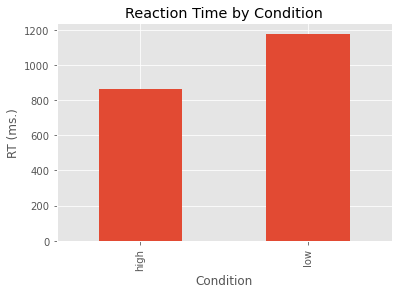

In [36]:
my_means = grouped_data.mean()['RT']
my_means.plot(kind='bar')
plt.ylabel('RT (ms.)')
plt.title('Reaction Time by Condition')
plt.show()

## One-Way ANOVA

To run a between participants one-way ANOVA to determine whether there is a difference between our two conditions we're going to use the `stats` module from the `scipy` library. We import it as follows... 

In [38]:
from scipy import stats

We are now going to subset our `anova_data` data frame. We are going to do that by using a logical condition `[anova_data['Condition']=='high']`. If we were to run the following we'd see we have the subset of the data frame where Condition is equal to 'high'.

In [42]:
anova_data[anova_data['Condition']=='high']

,Subject,Condition,RT
12,13,high,828
13,14,high,925
14,15,high,915
15,16,high,869
16,17,high,804
17,18,high,835
18,19,high,1022
19,20,high,919
20,21,high,842
21,22,high,805


But what we really want is to just select the `RT` column.

In [43]:
anova_data[anova_data['Condition']=='high']['RT']

12     828
13     925
14     915
15     869
16     804
17     835
18    1022
19     919
20     842
21     805
22     879
23     733
Name: RT, dtype: int64

By building on the above we can create two new variables, one corresponding to the data for the `high` condition group and the other for the `low` condition group.

In [44]:
high_group = anova_data[anova_data['Condition']=='high']['RT']
low_group = anova_data[anova_data['Condition']=='low']['RT']

We are now in a position to run a 1-way ANOVA. We use the`f_oneway` function in the `stats` module to do this. The two parameters that it needs are the two groups that we are wanting to compare to test the null hypothesis that the two groups have the same population mean. If we had three groups, we would pass the three groups to the function.  

In [45]:
stats.f_oneway(high_group, low_group)

F_onewayResult(statistic=91.2168592809951, pvalue=2.767399319989348e-09)

Remember, the *p*-value is the probability of obtaining test results at least as extreme as the results observed, under the assumption that the null hypothesis is true. Note, the output above gives us the F-value and the *p*-value but not the degrees of freedom. As we just have two groups, we could also run an independent sample t-test using the `ttest_ind` function from `stats`.

In [46]:
stats.ttest_ind(high_group, low_group)

Ttest_indResult(statistic=-9.550751765227444, pvalue=2.7673993199893327e-09)

Note that the p-value is the same as we found with our ANOVA. And the *F*-statistic in the ANOVA is the *t*-statistic squared.

In [47]:
9.550751765227444 * 9.550751765227444

91.21685928099514

If we had three groups in our study, we could run the 1-way ANOVA as we did above and then if that is significant, we could run multiple t-tests with a manually adjusted alpha level (e.g., using the Bonferroni correction). One of the limitations with using the `stats` module is that degrees of freedom are not reported, nor is information about the residuals. In order to generate an ANOVA table more like the type we're familiar with we are going to use the `statsmodels` package. This isn't a package we yet have in our `data_science` environment so we need to install it using the Terminal shell.  

Go into your shell and activate the `data_science` environment using `conda activate data_science`. You then need to install the package using `conda install statsmodels`. Once it is installed, go back to your Jupyter Notebook and you should be able to import `statsmodels` and the `ols` module (for ordinary least squares models) as follows.

In [49]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

We define our model below using syntax not too disimilar from how we did the same in R. We are going to fit an OLS (Ordinary Least Squares) model to our data where our outcome variable `RT` is predicted by `Condition`. We then present the results in an ANOVA table using Type 3 Sums of Squares. This is much closer to the level of detail that we need.

In [50]:
model = ols('RT ~ Condition', data=anova_data).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,8.971781e+06,1.0,1387.801825,2.263783e-21
Condition,5.896935e+05,1.0,91.216859,2.767399e-09
Residual,1.422243e+05,22.0,NaN,NaN


The *F*-value is the mean square error of Condition divided by the mean square error of our Residuals.

In [53]:
(5.896935e+05 / 1) / (1.422243e+05 / 22)

91.21688065963411

## Factorial ANOVA

In many types of experiments we are interested in how two (or more) experimental factors interact with each other. For example, in a typical priming paradigm experiment we might be interested in whether people's response times to a positively or negatively valenced target stimulus are influenced by whether it was preceded by a positively or negatively valenced prime. 

The data in the file below are from a 2 x 2 repeated measures reaction time experiment. We were interested in how quickly participants could respond to Targets that were Positive vs. Negative when they followed Positive vs. Negative Primes. We expected that Positive Targets would be responded to more quickly after Positive vs. Negative Primes, and that Negative Targets would be responded to more quickly after Negative vs. Positive Primes. We measured the response times of 24 participants responding in each of these four conditions. We want to determine if there is a difference between our conditions (and if so, where that difference lies).

In [54]:
factorial_anova_data = pd.read_csv("https://raw.githubusercontent.com/ajstewartlang/02_intro_to_python_programming/main/data/ANOVA_data3.csv")

In [55]:
factorial_anova_data

,Subject,Prime,Target,RT
0,1,Negative,Positive,1355
1,2,Negative,Positive,1456
2,3,Negative,Positive,1538
3,4,Negative,Positive,1327
4,5,Negative,Positive,1529
...,...,...,...,...
91,20,Negative,Negative,1271
92,21,Negative,Negative,1315
93,22,Negative,Negative,1537
94,23,Negative,Negative,1349


In [56]:
grouped_data = factorial_anova_data.groupby(['Prime', 'Target'])
group_means = grouped_data.mean()['RT']
group_means

Prime     Target  
Negative  Negative    1420.166667
          Positive    1457.416667
Positive  Negative    1428.041667
          Positive     593.333333
Name: RT, dtype: float64

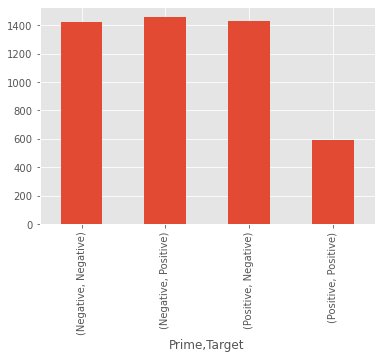

In [58]:
group_means.plot(kind="bar")
plt.show()

While the above plot looks *ok*, it's a little tricky seeing the nature of the interaction. Luckily the `statsmodels` library has a function called `interaction_plot` for plotting the kind of interaction we are interested in looking at.

In [62]:
from statsmodels.graphics.factorplots import interaction_plot

We need to create a `pandas` data frame that contains the means for each of our four conditions, and thus captures the 2 x 2 nature of our design. We can use `pd.DataFrame` to turn our object of means by condition into a data frame that we can then use in our interaction plot.

In [63]:
group_means = grouped_data.mean()
pd.DataFrame(group_means)

Subject           RT
Prime    Target                        
Negative Negative     12.5  1420.166667
         Positive     12.5  1457.416667
Positive Negative     12.5  1428.041667
         Positive     12.5   593.333333

We need to reset the grouping in the data frame above so that we can use it in our plot. We do that using the `reset_index()` method.

In [64]:
data_to_plot = pd.DataFrame(group_means).reset_index()
data_to_plot

,Prime,Target,Subject,RT
0,Negative,Negative,12.5,1420.166667
1,Negative,Positive,12.5,1457.416667
2,Positive,Negative,12.5,1428.041667
3,Positive,Positive,12.5,593.333333


The above now looks much more like a standard data frame. Below we created an interaction plot using the `interaction_plot` function. We specify the various aesthetics of the plot, add labels, and then display the plot. If we wanted to save it we would use the `plt.savefig` function. This will save the plot using the file path we provide as an argument to the function.

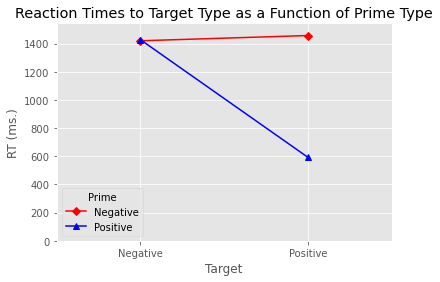

In [65]:
my_interaction_plot = interaction_plot(x=data_to_plot['Target'], trace=data_to_plot['Prime'], 
                                       response=data_to_plot['RT'], colors=['red', 'blue'], 
                                       markers=['D', '^'])
plt.xlabel('Target')
plt.ylabel('RT (ms.)')
plt.title('Reaction Times to Target Type as a Function of Prime Type')
plt.ylim(0)
plt.margins(.5, 1)

To build the factorial ANOVA model, we use the `AnovaRM` function from the `statsmodels` library. We need to specify our outcome variable (`RT`), our grouping variable (this is our random effect) plus our within participant effects. 

In [317]:
from statsmodels.stats.anova import AnovaRM

In [318]:
factorial_model = AnovaRM(data=factorial_anova_data, depvar='RT', within=['Prime', 'Target'], subject='Subject').fit()

print(factorial_model)

                   Anova
             F Value  Num DF  Den DF Pr > F
-------------------------------------------
Prime        471.4807 1.0000 23.0000 0.0000
Target       276.8183 1.0000 23.0000 0.0000
Prime:Target 284.8948 1.0000 23.0000 0.0000



We can also use this function to build ANOVAs with between participant factors. We just need to specifiy those with the parameter `betweeen` much in the same way we have done above with `within`. We see from the above that both main effects, plus the interaction are significant at p < .001. In order to interpret the interaction, we need to conduct pairwise comparisions. There are 2 key comparisons that will tell us where we have a priming effect. The first is comparining RTs to Positive Targets for Positive vs. Negative Primes, and the second is comparing RTs to Negative Targets following Positive vs. Negative Primes. We can effectively run these comparisons as *t*-tests and adopt a critical alpha level of .025 to control for the familywise error associated with running the two key tests.

One way to run the *t*-tests is to filter our data frame and create new variables for each of the condition combinations we want to compare. In the code below, we create a boolean index (i.e., True and False values) corresponding to cases where the Prime AND the Target are both Positive. We then apply this logical index to the data frame and map the `RT` column of that filtered data frame onto a new variable called `PP`. 

In [66]:
index = (factorial_anova_data['Prime']=='Positive') & (factorial_anova_data['Target']=='Positive')
PP = factorial_anova_data[index]['RT']

We then do the same for cases where the Prime is Negative and the Target is Positive. 

In [67]:
index = (factorial_anova_data['Prime']=='Negative') &(factorial_anova_data['Target']=='Positive')
NP = factorial_anova_data[index]['RT']

We can now run a *t*-test using the `stats.ttest_rel` function for paired samples *t*-tests.

In [68]:
stats.ttest_rel(PP, NP)

Ttest_relResult(statistic=-32.00158210315536, pvalue=1.41511213896552e-20)

We can see that this comparison is significant. Your challenge now is to write the code for the other comparison - in other words, comparing RTs to Negative Targets following Positive vs. Negative Primes.

```{admonition} Click the button to reveal answer
:class: dropdown 
    index = (factorial_anova_data['Prime']=='Positive') & (factorial_anova_data['Target']=='Negative')
    PN = factorial_anova_data[index]['RT'] 

    index = (factorial_anova_data['Prime']=='Negative') & (factorial_anova_data['Target']=='Negative')
    NN = factorial_anova_data[index]['RT']

    stats.ttest_rel(PN, NN) 
```

The following will be a group-based activity which you will do in class.

You need to build a new factorial ANOVA for the following experiment. The data in the file https://raw.githubusercontent.com/ajstewartlang/02_intro_to_python_programming/main/data/ANOVA_challenge.csv are from a 2 x 2 repeated measures design. 148 participants responded to a target image that was either positive or negative in valence. The target was preceded by a prime that was either also positive or negative in valence. We want to determine whether people responded faster to positive images following a positive prime (relative to following a negative prime),
and faster to negative images following a negative prime (relative to following a positive prime). Visualise the data and report the key descriptives before then running the appropriate ANOVA.

## Regression

As you may recall, ANOVA and regression are both cases of the General Linear Model in action. Let's turn now to regression. We're going to start by using the dataset called `crime_dataset.csv` - this dataset contains population data, housing price index data and crime data for cities in the US.

In [103]:
crime_data = pd.read_csv("https://raw.githubusercontent.com/ajstewartlang/09_glm_regression_pt1/master/data/crime_dataset.csv")

In [104]:
crime_data.head()

,Year,index_nsa,"City, State",Population,Violent Crimes,Homicides,Rapes,Assaults,Robberies
0,1975.0,41.080,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0
1,1975.0,30.750,"Chicago, IL",3150000.0,37160.0,818.0,1657.0,12514.0,22171.0
2,1975.0,36.350,"Cleveland, OH",659931.0,10403.0,288.0,491.0,2524.0,7100.0
3,1975.0,20.910,"Oakland, CA",337748.0,5900.0,111.0,316.0,2288.0,3185.0
4,1975.0,20.385,"Seattle, WA",503500.0,3971.0,52.0,324.0,1492.0,2103.0


First let’s do some wrangling. There is one column that combines both City and State information. Let’s separate that information out into two new columns called 'City' and 'State'. We first need to rename the column `City, State` to `City_State` in order to get rid of the space.

In [105]:
crime_data.rename(columns={'City, State':'City_State'}, inplace=True)

We then split the colunm `City_State` into two columns, the first called `City` and the second called `State`.

In [106]:
crime_data[['City','State']] = crime_data.City_State.str.split(expand=True,)

We can then drop the original column `City_State`.

In [107]:
crime_data.drop('City_State', axis=1)

,Year,index_nsa,Population,Violent Crimes,Homicides,Rapes,Assaults,Robberies,City,State
0,1975.0,41.080000,490584.0,8033.0,185.0,443.0,3518.0,3887.0,"Atlanta,",GA
1,1975.0,30.750000,3150000.0,37160.0,818.0,1657.0,12514.0,22171.0,"Chicago,",IL
2,1975.0,36.350000,659931.0,10403.0,288.0,491.0,2524.0,7100.0,"Cleveland,",OH
3,1975.0,20.910000,337748.0,5900.0,111.0,316.0,2288.0,3185.0,"Oakland,",CA
4,1975.0,20.385000,503500.0,3971.0,52.0,324.0,1492.0,2103.0,"Seattle,",WA
...,...,...,...,...,...,...,...,...,...,...
3472,2015.0,194.641250,401520.0,3628.0,55.0,365.0,2354.0,854.0,"Tulsa,",OK
3473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,2015.0,248.035833,672228.0,8084.0,162.0,494.0,4024.0,3404.0,"Washington,",DC
3475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
crime_data.head()

,Year,index_nsa,City_State,Population,Violent Crimes,Homicides,Rapes,Assaults,Robberies,City,State
0,1975.0,41.080,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,"Atlanta,",GA
1,1975.0,30.750,"Chicago, IL",3150000.0,37160.0,818.0,1657.0,12514.0,22171.0,"Chicago,",IL
2,1975.0,36.350,"Cleveland, OH",659931.0,10403.0,288.0,491.0,2524.0,7100.0,"Cleveland,",OH
3,1975.0,20.910,"Oakland, CA",337748.0,5900.0,111.0,316.0,2288.0,3185.0,"Oakland,",CA
4,1975.0,20.385,"Seattle, WA",503500.0,3971.0,52.0,324.0,1492.0,2103.0,"Seattle,",WA


We also need to get rid of the space in the `Violent Crimes` column and rename the column `index_nsa` as `house_prices`. We are first going to set a dictionary, called a `dict` which contains the old names and the new names of the columns that we want to rename.

In [119]:
dict = {'Violent Crimes':'Violent_Crimes', 'index_nsa':'house_prices'}

crime_data.rename(columns=dict, inplace=True)

In [120]:
crime_data.head()

,Year,house_prices,City_State,Population,Violent_Crimes,Homicides,Rapes,Assaults,Robberies,City,State
0,1975.0,41.080,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,"Atlanta,",GA
1,1975.0,30.750,"Chicago, IL",3150000.0,37160.0,818.0,1657.0,12514.0,22171.0,"Chicago,",IL
2,1975.0,36.350,"Cleveland, OH",659931.0,10403.0,288.0,491.0,2524.0,7100.0,"Cleveland,",OH
3,1975.0,20.910,"Oakland, CA",337748.0,5900.0,111.0,316.0,2288.0,3185.0,"Oakland,",CA
4,1975.0,20.385,"Seattle, WA",503500.0,3971.0,52.0,324.0,1492.0,2103.0,"Seattle,",WA


Now let's plot our data to see the relationship between Violent Crimes and the Population attributes in our dataframe.

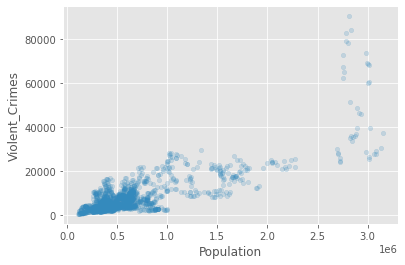

In [125]:
crime_data.plot(kind='scatter', x='Population', y='Violent_Crimes', alpha=0.2)
plt.show()

So, it looks like there is a positive relationship between these two attributes. We can capture the strength of it by calculating Pearson's r. 

In [141]:
crime_data[{'Violent_Crimes', 'Population'}].corr(method='pearson')

,Population,Violent_Crimes
Population,1.000000,0.808718
Violent_Crimes,0.808718,1.000000


We see from the above that there is a positive relationship (r=0.81)between population size and the rate of violent crime. From the plot, we might conclude that the relationship is being overly influenced by crime in a small number of very large cities (top right of the plot above). Let’s exclude cities with populations greater than 2,000,000

In [154]:
crime_data_filtered = crime_data[crime_data['Population'] < 2000000]

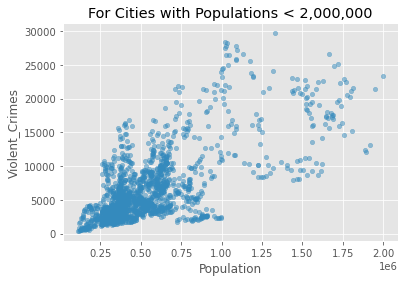

In [159]:
crime_data_filtered.plot(kind='scatter', x='Population', y='Violent_Crimes', alpha=0.5)
plt.title('For Cities with Populations < 2,000,000')
plt.show()

Now let's look at the correlation between Violent Crimes and Population size for cities with a population of less than 2,000,000.

In [161]:
crime_data_filtered[{'Violent_Crimes', 'Population'}].corr(method='pearson')

,Population,Violent_Crimes
Population,1.00000,0.68638
Violent_Crimes,0.68638,1.00000


It's still clearly there but a little weaker than on the full dataset.

Let's focus just on the year 2015 and build a linear model to see how the number of violent crimes is prediction by the population size.

In [172]:
crime_data_2015 = crime_data_filtered[crime_data_filtered['Year'] == 2015]

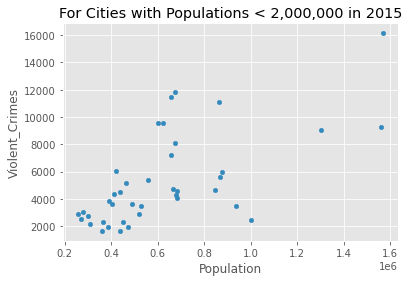

In [205]:
crime_data_2015.plot(kind='scatter', x='Population', y='Violent_Crimes', alpha=1)
plt.title('For Cities with Populations < 2,000,000 in 2015')
plt.show()

In [206]:
crime_data_2015[{'Violent_Crimes', 'Population'}].corr(method='pearson')

,Population,Violent_Crimes
Population,1.000000,0.649353
Violent_Crimes,0.649353,1.000000


We are going to build our model using `ols` from `statsmodels`

In [229]:
model = ols('Violent_Crimes ~ Population', data=crime_data_2015)
results = model.fit()

We can print the parameters of our linear model using the `params` method on our model fit.

In [230]:
results.params

Intercept     944.333528
Population      0.006963
dtype: float64

We can check to see whether our predictor is significant by conducting a *t*-test on it.

In [231]:
print(results.t_test([0, 1]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0070      0.001      5.264      0.000       0.004       0.010


Taking the above together, we see that population significantly predicts violent crimes. For every increase in population by 1, violent crimes increase by 0.006963. We can use this information to predict how many violent crimes might be expected if a city has a population of 1,000,000. For a city with a population of about a million, there will be about 7907 Violent Crimes. We calculate this by multiplying the estimate of our predictor (0.006963) by 1,000,000 and then adding the intercept (944.3). This gives us 7907.3 violent crimes.